<a href="https://colab.research.google.com/github/ravi-gopalan/DAND_Data_Wrangling/blob/master/scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install chromium, its driver, and selenium
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

import time
import pandas as pd
import matplotlib.pyplot as plt
import re

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options)



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 71.9 MB of archives.
After this operation, 257 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 78.0.3904.70-0ubuntu0.18.04.2 [1,078 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 78.0.3904.70-0ubuntu0.18.04.2 [63.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser-l10n all 78.0.390

In [10]:
url = 'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'

y = 200
for i in range(0,200):
  driver.execute_script("window.scrollTo(0,"+str(y)+")")
  y += 1000
  time.sleep(2)
driver.get(url)
driver.title





'abillionveg - Vegan food & cruelty-free products - Apps on Google Play'

In [0]:
# Selenium script to scroll to the bottom, wait 3 seconds for the next batch of data to load, then continue scrolling.  
# It will continue to do this until the page stops loading new data.
url = 'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'
driver.get(url)
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight); var lenOfPage=document.body.scrollHeight; return lenOfPage;")
match=False
while(match==False):
  lastCount = lenOfPage
  time.sleep(3)
  lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
  if lastCount==lenOfPage:
    match=True

In [3]:
lenOfPage

23933

In [4]:
driver.current_url

'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'

17

In [5]:
bu = driver.find_elements_by_css_selector('button.LkLjZd.ScJHi.OzU4dc')

#driver.find_element_by_css_selector('span.CwaK9').click()


len(bu)

17

In [6]:
for item in bu:
  time.sleep(1)
  item.click()
  time.sleep(1)

ElementClickInterceptedException: ignored

In [7]:
driver.current_url

'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'

In [54]:
driver.find_element_by_xpath("//div[@button='U26fgb.O0WRkf.oG5Srb.C0oVfc.n9lfJ.M9Bg4d']")
#driver.find_element_by_xpath("//span[@jsname='bN97Pc']").text

NoSuchElementException: ignored

In [55]:
driver.find_elements_by_link_text('Full Review')
#(By.XPATH, '//button[text()="Read All Reviews"]')

[]

In [69]:
for item in driver.find_elements(By.XPATH, '//button[text()="Full Review"]'):
  print(item.text)

Full Review
Full Review
Full Review
Full Review
Full Review
Full Review
Full Review
Full Review
Full Review
Full Review
Full Review


In [0]:
for item in driver.find_elements(By.XPATH, '//button[text()="Full Review"]'):
  item.click()
  time.sleep(1)

[<selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="76c03bc2-8ecc-4481-a9b9-57b092b5120a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="a7be3c4e-3fe4-4f45-9afa-63fb83cfb346")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="c972dc2b-c863-43e9-8f91-5abb8e76f33e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="5959de5d-46a1-4641-b02e-9fc58d964be2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="8141a1b1-380a-42ae-a9b3-40de8be36a76")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="d7ec374f-6ae6-410f-9a32-f6fe9f40b214")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="9e56b688-f3e8-43b4-91e2-9f

In [7]:
full_reviews  = driver.find_elements(by='xpath',value="//span[@jsname='fbQN7e']")
print(full_reviews)
for review in full_reviews:
        for paragraph in review.find_elements(By.TAG_NAME, 'span'):
            print(paragraph.get_attribute('textContent').encode("utf-8"))
        print('\n============================\n')

[<selenium.webdriver.remote.webelement.WebElement (session="56ee0aef89f58122d1f4ea94b8c1b4e5", element="b0a3e216-285d-4e0f-ba97-3130abfbcf8d")>, <selenium.webdriver.remote.webelement.WebElement (session="56ee0aef89f58122d1f4ea94b8c1b4e5", element="fe9b60ee-b1a5-46c1-9e1b-7bbcfd4292eb")>, <selenium.webdriver.remote.webelement.WebElement (session="56ee0aef89f58122d1f4ea94b8c1b4e5", element="46abb7ef-ec36-4d72-848b-90fd34c02669")>, <selenium.webdriver.remote.webelement.WebElement (session="56ee0aef89f58122d1f4ea94b8c1b4e5", element="d8233220-c3d9-4fd0-bcde-1d7491d486da")>]










In [11]:
full_reviews[0].find_elements(By.TAG_NAME, 'p')

[]

In [72]:

driver.find_element_by_xpath("//span[@jsname='bN97Pc']").text

"Loving the concept of this app. Even without the donations it's still a great idea. However that is a major incentive. What that said almost everything works pretty well however when you take a photo it comes out sideways and that's aggravating cuz you can't rotate it or anything. But other than tha...\nFull Review"

In [102]:
driver.find_element_by_xpath("//span[@class='p2TkOb']").text

'October 25, 2019'

In [105]:

driver.find_element_by_xpath("//input[@role='button' and @class='U26fgb O0WRkf oG5Srb C0oVfc n9lfJ M9Bg4d' and @jsaction='click:cOuCgd; mousedown:UX7yZ; mouseup:lbsD7e; mouseenter:tfO1Yc; mouseleave:JywGue; focus:AHmuwe; blur:O22p3e; contextmenu:mg9Pef;touchstart:p6p2H; touchmove:FwuNnf; touchend:yfqBxc(preventMouseEvents=true|preventDefault=true); touchcancel:JMtRjd;' and @jscontroller='VXdfxd']").click()

time.sleep(3)



NoSuchElementException: ignored

In [112]:
reviewer = []
review_date = []
i = 0

review_info = {}
for item in driver.find_elements_by_css_selector('div.bAhLNe.kx8XBd'):
  reviewer.append(item.text)

helpful_reviews = driver.find_elements_by_css_selector('div.jUL89d.y92BAb')
abridged_review = driver.find_elements(by='xpath',value="//span[@jsname='bN97Pc']")
full_reviews  = driver.find_elements(by='xpath',value="//span[@jsname='fbQN7e']")
stars = driver.find_elements(by='xpath',value="//span[@class='nt2C1d']//div//div[@role='img']")
print(len(reviewer),len(abridged_review), len(full_reviews), len(helpful_reviews),len(stars))

92 92 92 92 92


In [0]:

all_reviews = []
for i, (r, a, f, h, s) in enumerate(zip(reviewer, abridged_review,full_reviews, helpful_reviews, stars )):
  review_info = {}
  review_info.update({'id':i, \
                      'name':r.split('\n')[0], \
                      'review_date':r.split('\n')[1], \
                      'abridged_review': a.text, \
                      'full_review': f.text, \
                      'helpful_review': h.text, \
                      'stars':re.findall(r"\d",s.get_attribute('aria-label'))[0]})
  all_reviews.append(review_info)


In [186]:
df_review = pd.DataFrame(all_reviews)
df_review.info()
df_review['review_date'] = df_review['review_date'].apply(lambda x: pd.datetime.strptime(x, '%B %d, %Y'))
df_review['helpful_review'] = pd.to_numeric(df_review['helpful_review'], errors='coerce')
df_review['stars'] = df_review['stars'].astype('int8') 
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
id                 92 non-null int64
name               92 non-null object
review_date        92 non-null object
abridged_review    92 non-null object
full_review        92 non-null object
helpful_review     92 non-null object
stars              92 non-null object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
id                 92 non-null int64
name               92 non-null object
review_date        92 non-null datetime64[ns]
abridged_review    92 non-null object
full_review        92 non-null object
helpful_review     62 non-null float64
stars              92 non-null int8
dtypes: datetime64[ns](1), float64(1), int64(1), int8(1), object(3)
memory usage: 4.5+ KB


In [187]:
df_review.head()

,id,name,review_date,abridged_review,full_review,helpful_review,stars
0,0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,,2.0,4
1,1,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,,8.0,5
2,2,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",,1.0,4
3,3,eclipse9871,2019-10-16,Love this app especially because it allows use...,,4.0,5
4,4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,,NaN,3


In [188]:
df_review.full_review

0      
1      
2      
3      
4      
     ..
87     
88     
89     
90     
91     
Name: full_review, Length: 92, dtype: object

In [189]:
df_review.drop(columns=['full_review'],inplace=True)
df_review.info()
df_review.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
id                 92 non-null int64
name               92 non-null object
review_date        92 non-null datetime64[ns]
abridged_review    92 non-null object
helpful_review     62 non-null float64
stars              92 non-null int8
dtypes: datetime64[ns](1), float64(1), int64(1), int8(1), object(2)
memory usage: 3.8+ KB


,id,name,review_date,abridged_review,helpful_review,stars
0,0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4
1,1,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5
2,2,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4
3,3,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5
4,4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3


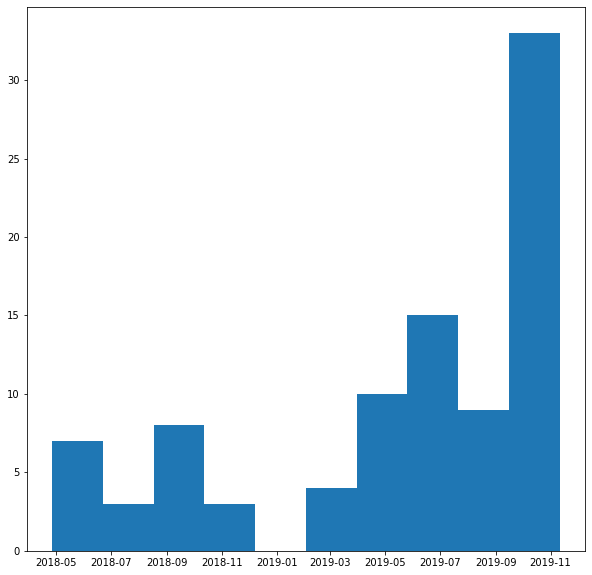

In [190]:
plt.figure(figsize=(10,10))
plt.hist(df_review['review_date'])
plt.show()


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


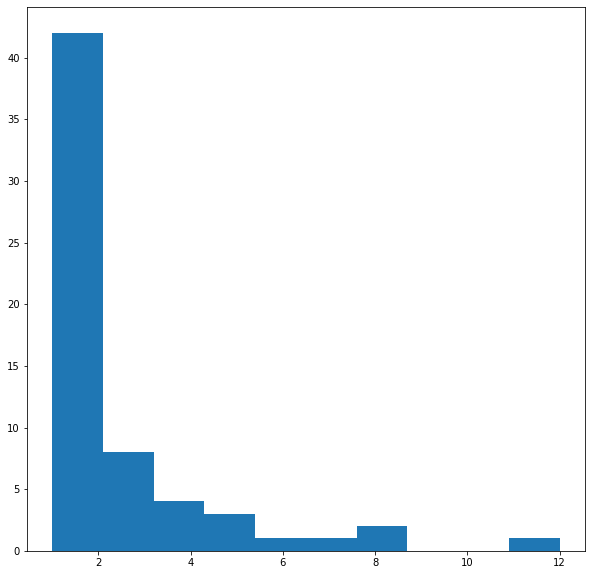

In [191]:
plt.figure(figsize=(10,10))
plt.hist(df_review['helpful_review'])
plt.show()

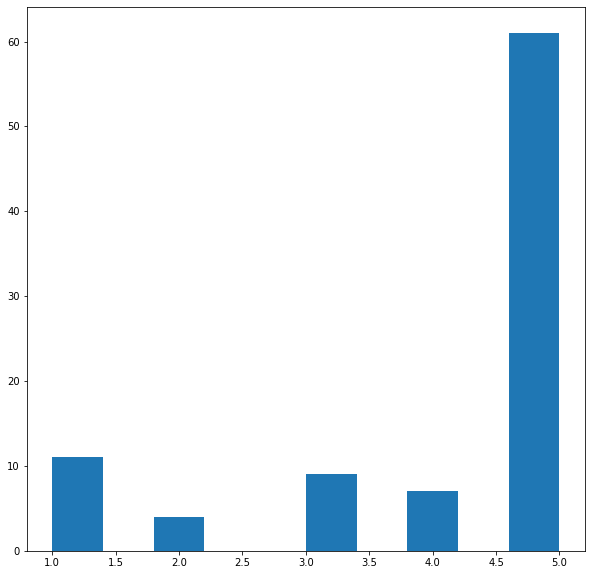

In [192]:
plt.figure(figsize=(10,10))
plt.hist(df_review['stars'])
plt.show()

In [0]:
dates = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='p2TkOb']")
person = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='X43Kjb']")
all_comms = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']")

In [166]:
for i, (d, p, a) in enumerate(zip(dates, person, all_comms)):
  print(i+1, d.text, p.text, a.text.split('\n')[1])

1 October 29, 2019 abillionveg Hi Jared, We apologize for the issue with uploading photos, it's due to how our server sometimes recognizes and renders photos. We're building in image editing features that will go out in Q1 2020 that will fix this. From all of us at abillionveg, a big thank you for being part of the journey as we build this. All the best, Vikas
2 October 22, 2019 abillionveg Wow thank you for this amazing review Shweta!
3 October 22, 2019 abillionveg Dear Ong, Thank you so much for the feedback on accessing folders in your gallery. It's something that's on our product roadmap and we will get this right for you. We also have some exciting new features related to photos that will be appearing before year-end. Thanks for taking the time to post this review! All the best, Vikas
4 October 22, 2019 abillionveg Hello! Thank you so much for the wonderful review of the app. We have so many new features and improvements that are going in before the end of the year that are going 

In [0]:
dates = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='p2TkOb']")
person = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='X43Kjb']")
all_comms = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']")


all_responses = []
for i, (d, p, a) in enumerate(zip(dates, person, all_comms)):
  response_info = {}
  response_info.update({'id':i, \
                      'responder_name':p.text, \
                      'response_date':d.text, \
                      'response_text':a.text.split('\n')[1]})
  all_responses.append(response_info)

In [171]:
all_responses

[{'id': 0,
  'responder_name': 'abillionveg',
  'response_date': 'October 29, 2019',
  'response_text': "Hi Jared, We apologize for the issue with uploading photos, it's due to how our server sometimes recognizes and renders photos. We're building in image editing features that will go out in Q1 2020 that will fix this. From all of us at abillionveg, a big thank you for being part of the journey as we build this. All the best, Vikas"},
 {'id': 1,
  'responder_name': 'abillionveg',
  'response_date': 'October 22, 2019',
  'response_text': 'Wow thank you for this amazing review Shweta!'},
 {'id': 2,
  'responder_name': 'abillionveg',
  'response_date': 'October 22, 2019',
  'response_text': "Dear Ong, Thank you so much for the feedback on accessing folders in your gallery. It's something that's on our product roadmap and we will get this right for you. We also have some exciting new features related to photos that will be appearing before year-end. Thanks for taking the time to post this

In [175]:
df_response = pd.DataFrame(all_responses)
df_response['response_date'] = df_response['response_date'].apply(lambda x: pd.datetime.strptime(x, '%B %d, %Y'))
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
id                90 non-null int64
responder_name    90 non-null object
response_date     90 non-null datetime64[ns]
response_text     90 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.9+ KB


In [173]:
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
id                90 non-null int64
responder_name    90 non-null object
response_date     90 non-null object
response_text     90 non-null object
dtypes: int64(1), object(3)
memory usage: 2.9+ KB


In [176]:
df_response.head()

,id,responder_name,response_date,response_text
0,0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo..."
1,1,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!
2,2,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o..."
3,3,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...
4,4,abillionveg,2019-08-21,"Hey Jay, Thanks so much for the review. We hav..."


In [199]:
df_review.iloc[:13]


,id,name,review_date,abridged_review,helpful_review,stars
0,0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4
1,1,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5
2,2,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4
3,3,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5
4,4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3
5,5,Theresa Salchert,2019-10-16,"I really love this app. Very easy to use, grea...",NaN,5
6,6,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5
7,7,Hazel Sim,2019-10-16,If you're finding it hard to dine out with fri...,NaN,5
8,8,Lee Sheng Chua,2019-09-16,Love how this app binds people of same beliefs...,1.0,5
9,9,Joy Rose,2019-09-26,A great app with a great mission. I've donated...,1.0,5


In [208]:
df_review.iloc[63]

id                                                                63
name                                                   Sibel Şendere
review_date                                      2019-11-11 00:00:00
abridged_review    I reviewed 10 vegan products and this app dona...
helpful_review                                                   NaN
stars                                                              5
Name: 63, dtype: object

In [212]:
df_review = pd.concat([df_review.iloc[:13],\
                       df_review.iloc[14:63],\
                       df_review.iloc[64:],\
                       df_review.iloc[13],\
                       df_review.iloc[63]]).reset_index(drop=True)
df_review.head(20)


,0,abridged_review,helpful_review,id,name,review_date,stars
0,NaN,Loving the concept of this app. Even without t...,2.0,0.0,Jared Thresher,2019-10-25,4.0
1,NaN,Been using this app for a while now.Apart from...,8.0,1.0,Shweta Ramanujam,2019-10-14,5.0
2,NaN,"Overall considered not bad, it is good that ha...",1.0,2.0,Yoga Ong,2019-10-08,4.0
3,NaN,Love this app especially because it allows use...,4.0,3.0,eclipse9871,2019-10-16,5.0
4,NaN,I like the idea! I think it's a little hard to...,NaN,4.0,Jay Laone,2019-08-20,3.0
5,NaN,"I really love this app. Very easy to use, grea...",NaN,5.0,Theresa Salchert,2019-10-16,5.0
6,NaN,Fantastic app. Great resource which is useful ...,NaN,6.0,Jonny Marshall,2019-10-06,5.0
7,NaN,If you're finding it hard to dine out with fri...,NaN,7.0,Hazel Sim,2019-10-16,5.0
8,NaN,Love how this app binds people of same beliefs...,1.0,8.0,Lee Sheng Chua,2019-09-16,5.0
9,NaN,A great app with a great mission. I've donated...,1.0,9.0,Joy Rose,2019-09-26,5.0


In [213]:
df_review.tail()

,0,abridged_review,helpful_review,id,name,review_date,stars
97,Sibel Şendere,NaN,NaN,NaN,NaN,NaT,NaN
98,2019-11-11 00:00:00,NaN,NaN,NaN,NaN,NaT,NaN
99,I reviewed 10 vegan products and this app dona...,NaN,NaN,NaN,NaN,NaT,NaN
100,NaN,NaN,NaN,NaN,NaN,NaT,NaN
101,5,NaN,NaN,NaN,NaN,NaT,NaN


In [0]:
df_review = concat([df_review.iloc[:2], line, df.iloc[3:]]).reset_index(drop=True)

In [0]:
df_review.to_csv('reviews.csv')
df_response.to_csv('responses.csv')


In [185]:
df_response.response_text

0     Hi Jared, We apologize for the issue with uplo...
1         Wow thank you for this amazing review Shweta!
2     Dear Ong, Thank you so much for the feedback o...
3     Hello! Thank you so much for the wonderful rev...
4     Hey Jay, Thanks so much for the review. We hav...
                            ...                        
85    Wow, that's wonderful Leong Yoke. I hope you'l...
86    Thanks very much Pratik, we just crossed 5,000...
87    Thanks very much Larcielto. How do you like th...
88    Thank you Pragnya, grateful to have you on boa...
89    Thanks very much Rishabh, we just crossed 5,00...
Name: response_text, Length: 90, dtype: object

In [193]:
df_review.query('review_date > "2019-10-30"')

,id,name,review_date,abridged_review,helpful_review,stars
13,13,caiyun Xu,2019-10-31,"It's a useful app. We can share our reviews, e...",NaN,5
63,63,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5


In [67]:
import nltk
nltk.download(['stopwords','punkt','wordnet'])
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [0]:

reviewer_names = driver.find_elements(by='xpath',value="//span[@class='X43Kjb']")
review_date = driver.find_elements(by='xpath',value="//span[@class='p2TkOb']")
abridged_review = driver.find_elements(by='xpath',value="//span[@jsname='bN97Pc']")
full_reviews  = driver.find_elements(by='xpath',value="//span[@jsname='fbQN7e']")

In [59]:
len(full_reviews)

40

In [61]:
for i in range(0,40):
  print(i+1,reviewer_names[i].text, review_date[i].text, abridged_review[i].text, full_reviews[i].text )

1 Jared Thresher October 25, 2019  Loving the concept of this app. Even without the donations it's still a great idea. However that is a major incentive. What that said almost everything works pretty well however when you take a photo it comes out sideways and that's aggravating cuz you can't rotate it or anything. But other than that I'm loving this app and I just donated for the second time!
2 abillionveg October 29, 2019  Been using this app for a while now.Apart from looking for reviews of restaurants and dishes, the app also provides products which are vegan(which is new) comparing the apps I have used previously.The best thing about this app is it gives me a chance to do something good for the animals. A very noble concept, which has made me love this app more and more.
3 Shweta Ramanujam October 14, 2019  Overall considered not bad, it is good that having an app to help a vegan / vegetarian on searching vegan food nearby or somewhere. The review function also make me easier on m

In [10]:
for button in driver.find_elements_by_xpath("//div[@class='cQj82c']"):
  button.click()

ElementClickInterceptedException: ignored

In [0]:
# click radio button
full_review_button = driver.find_elements_by_xpath("//input[@class='LkLjZd ScJHi OzU4dc  ' and @jsaction='click:TiglPc' and @jsname='gxjVle']")[0]
full_review_button.click()

In [5]:
count = 0
for element in driver.find_elements(by='xpath',value="//span[@class='X43Kjb']"):
  count += 1
  print(count, element.text)

count = 0
for element in driver.find_elements(by='xpath',value="//span[@class='p2TkOb']"):
  count += 1  
  print(count, element.text)

count = 0
for element in driver.find_elements(by='xpath',value="//span[@jsname='bN97Pc']"):
  count += 1  
  print(count, element.text)


count = 0
for element in driver.find_elements(by='xpath',value="//span[@jsname='fbQN7e']"):
  count += 1  
  print(count, element.text)


1 Jared Thresher
2 abillionveg
3 Shweta Ramanujam
4 abillionveg
5 Yoga Ong
6 abillionveg
7 eclipse9871
8 abillionveg
1 October 25, 2019
2 October 29, 2019
3 October 14, 2019
4 October 22, 2019
5 October 8, 2019
6 October 22, 2019
7 October 16, 2019
8 October 22, 2019
1 Loving the concept of this app. Even without the donations it's still a great idea. However that is a major incentive. What that said almost everything works pretty well however when you take a photo it comes out sideways and that's aggravating cuz you can't rotate it or anything. But other than tha...
Full Review
2 Been using this app for a while now.Apart from looking for reviews of restaurants and dishes, the app also provides products which are vegan(which is new) comparing the apps I have used previously.The best thing about this app is it gives me a chance to do something good for the animals. A very nobl...
Full Review
3 Overall considered not bad, it is good that having an app to help a vegan / vegetarian on sear